# momapy: a python library for molecular maps

In [1]:
import momapy.sbgn.io
import momapy.sbgn.styling
import momapy.sbgn.utils
import momapy.rendering.skia
import momapy.builder
import momapy.coloring
import momapy.styling

In [2]:
from momapy.demo.utils import display, show_room

Fontconfig warning: "/usr/share/fontconfig/conf.avail/05-reset-dirs-sample.conf", line 6: unknown element "reset-dirs"


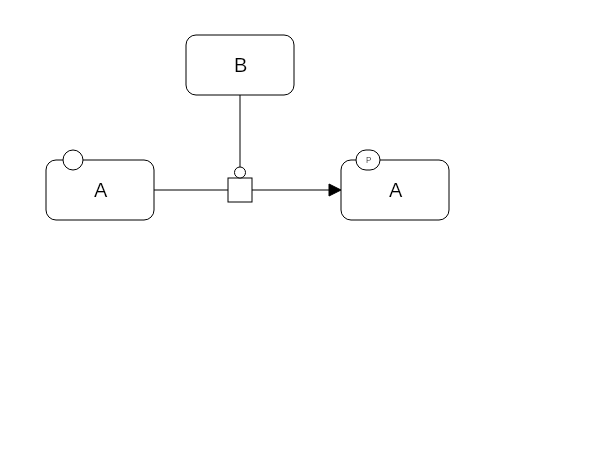

In [3]:
m1 = momapy.sbgn.io.read_file("phospho1.sbgn")
display(m1)

In [4]:
assert m1.model
assert m1.layout
assert m1.model_layout_mapping

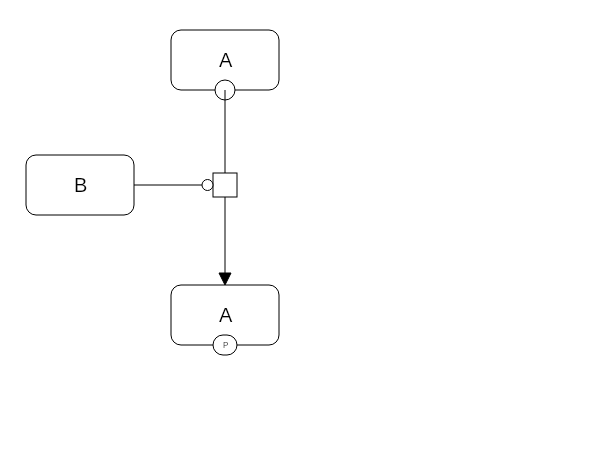

In [5]:
m2 = momapy.sbgn.io.read_file("phospho2.sbgn")
display(m2)

In [6]:
m1 == m2

False

In [7]:
m1.layout == m2.layout

False

In [8]:
m1.model == m2.model

True

In [9]:
try:
    m1.layout.stroke = momapy.coloring.colors.red
except Exception as e:
    print(e)

cannot assign to field 'stroke'


In [10]:
m1_builder = momapy.builder.builder_from_object(m1)

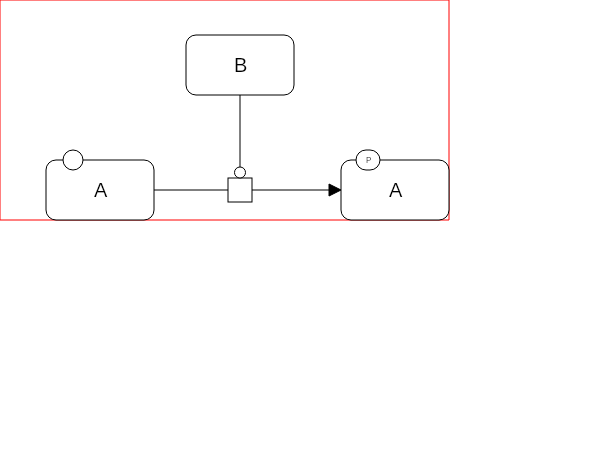

In [11]:
m1_builder.layout.stroke = momapy.coloring.colors.red
display(m1_builder)

In [12]:
m1_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)

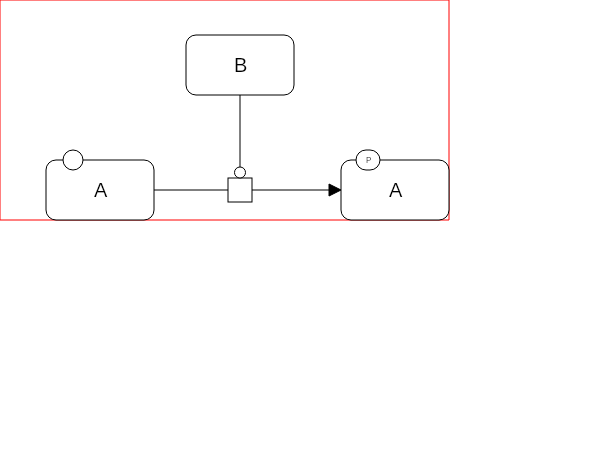

In [13]:
m1_builder.layout.stroke = momapy.coloring.colors.red
display(m1_builder)

In [14]:
m1 = momapy.sbgn.io.read_file("phospho1.sbgn")
m1_builder = momapy.builder.builder_from_object(m1)
m1 == m1_builder.build()

True

In [15]:
m1a_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)
m1b_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)
m1a_builder == m1b_builder

False

In [16]:
m1a = m1a_builder.build()
m1b = m1b_builder.build()
m1a == m1b

True

In [17]:
m1_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)
m1_builder.layout.stroke_width = 3
m1_builder.layout.stroke = momapy.coloring.colors.red
m1 = m1_builder.build()

In [18]:
s = set([])
for i in range(256):
    for j in range(0):
            m1_builder.layout.stroke = momapy.coloring.rgba(i, j, 0, 1.0)
            s.add(m1_builder.build())
l = list(s)

In [19]:
%%time
m1 in s

CPU times: user 114 µs, sys: 35 µs, total: 149 µs
Wall time: 154 µs


False

In [20]:
%%time
m1 in l

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


False

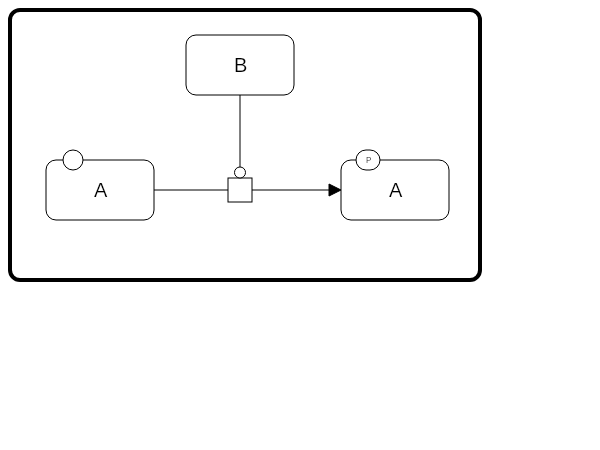

In [21]:
m1_builder = momapy.sbgn.io.read_file("phospho1comp.sbgn", return_builder=True)
m1 = m1_builder.build()
display(m1)

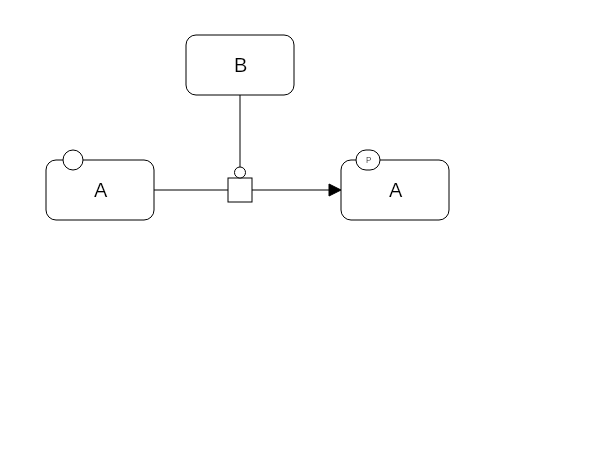

In [22]:
m2_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)
m2_builder.layout.position = m1_builder.layout.position
m2_builder.layout.width = m1_builder.layout.width
m2_builder.layout.height = m1_builder.layout.height
m2 = m2_builder.build()
display(m2)

In [23]:
m1.layout.is_sublayout(m2.layout)

True

In [24]:
m1.is_submap(m2)

False

In [25]:
m1.model.is_submodel(m2.model)

False

In [26]:
m1_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)
m1_builder.layout.stroke = momapy.coloring.colors.purple
momapy.sbgn.utils.set_layout_to_fit_content(m1_builder, xsep=10, ysep=10)

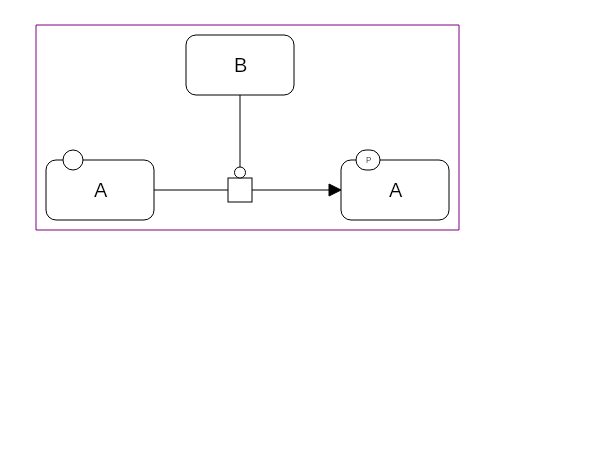

In [27]:
display(m1_builder)

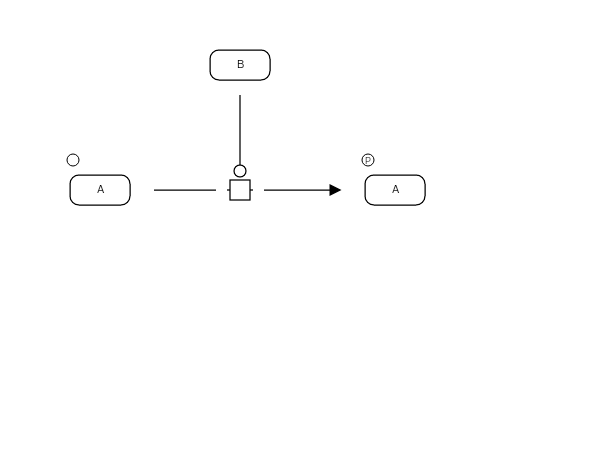

In [28]:
momapy.styling.apply_style_sheet(m1_builder.layout, momapy.sbgn.styling.newt)
display(m1_builder)

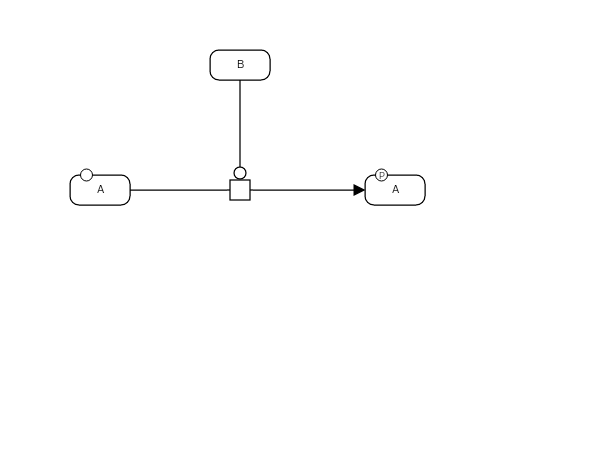

In [29]:
momapy.sbgn.utils.set_auxilliary_units_to_borders(m1_builder)
momapy.sbgn.utils.set_arcs_to_borders(m1_builder)
display(m1_builder)

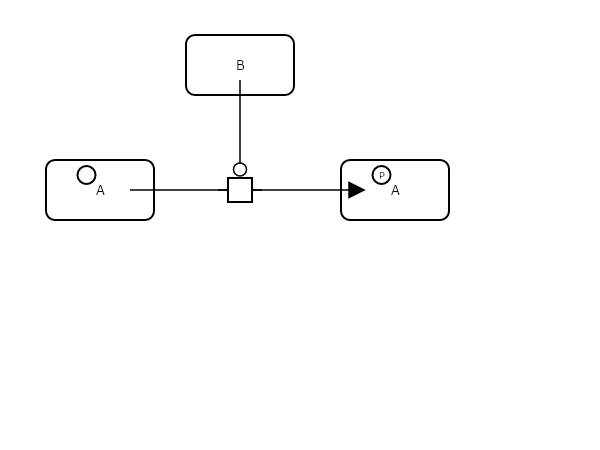

In [30]:
momapy.styling.apply_style_sheet(m1_builder.layout, momapy.sbgn.styling.vanted)
display(m1_builder)

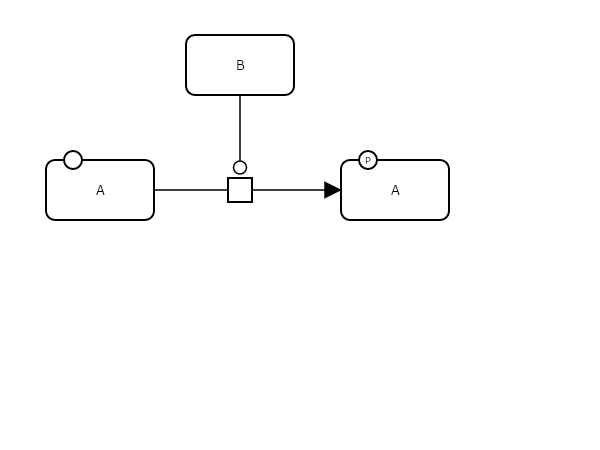

In [31]:
momapy.sbgn.utils.set_auxilliary_units_to_borders(m1_builder)
momapy.sbgn.utils.set_arcs_to_borders(m1_builder)
display(m1_builder)

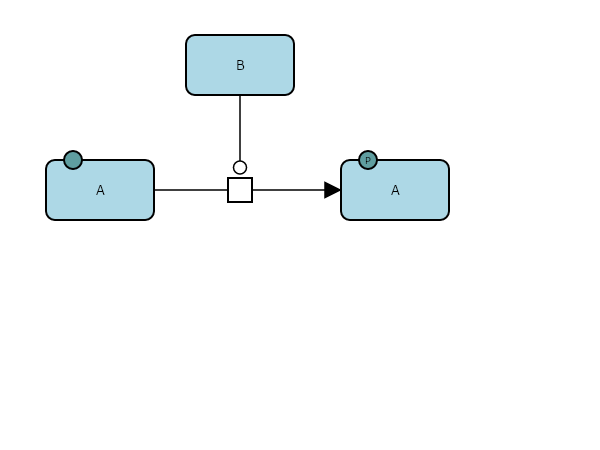

In [32]:
momapy.styling.apply_style_sheet(m1_builder.layout, momapy.sbgn.styling.default_colorscheme)
display(m1_builder)

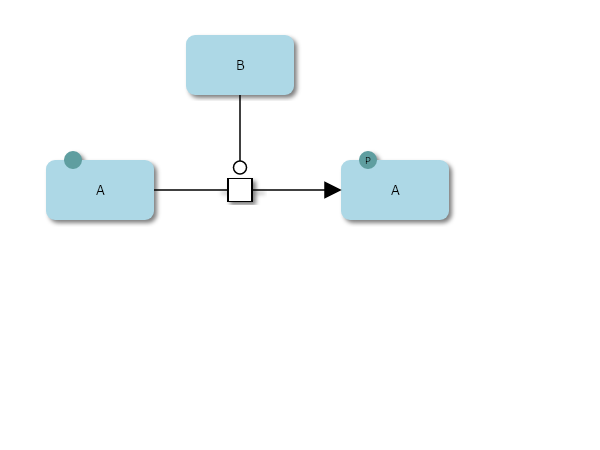

In [33]:
momapy.styling.apply_style_sheet(m1_builder.layout, momapy.sbgn.styling.shadows)
display(m1_builder)

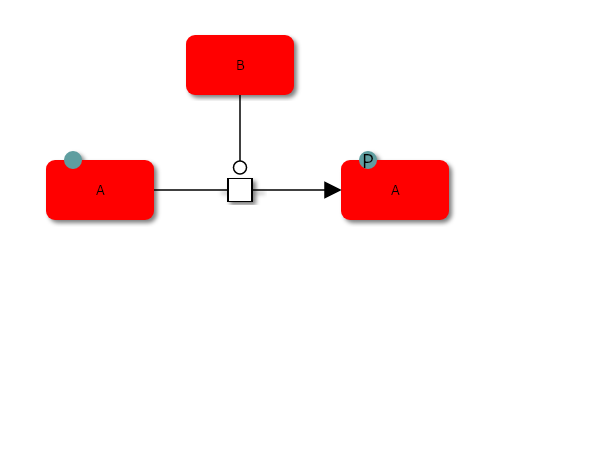

In [34]:
s = """
    MacromoleculeLayout {
        stroke_width: 3;
        fill: red;
    }
    
    StateVariableLayout > TextLayout {
        font_size: 20.0;
    }
    """
my_style_sheet = momapy.styling.read_string(s)
momapy.styling.apply_style_sheet(m1_builder.layout, my_style_sheet)
display(m1_builder)

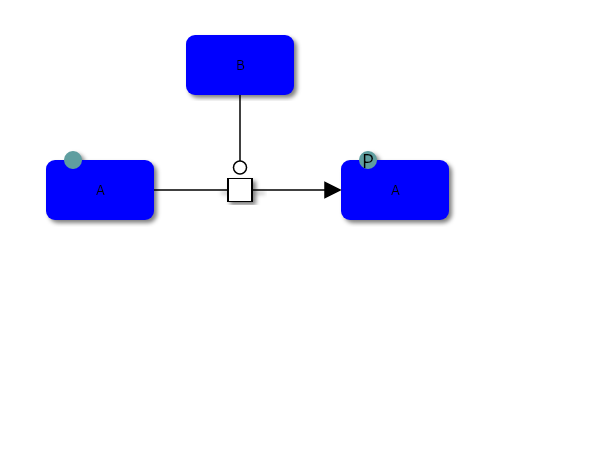

In [35]:
s = s.replace("red", "blue")
with open("my_style_sheet.css", "w") as f:
    f.write(s)
my_style_sheet = momapy.styling.read_file("my_style_sheet.css")
momapy.styling.apply_style_sheet(m1_builder.layout, my_style_sheet)
display(m1_builder)

In [36]:
gaussian_blur_effect = momapy.drawing.GaussianBlurEffect(
    in_=momapy.drawing.FilterEffectInput.SOURCE_GRAPHIC,
    std_deviation=3.0,
    result="gaussian_blur",
)
composite_effect1 = momapy.drawing.CompositeEffect(
    in_=momapy.drawing.FilterEffectInput.SOURCE_GRAPHIC,
    in2=gaussian_blur_effect.result,
    operator=momapy.drawing.CompositionOperator.OUT,
    result="composite1",
)
flood_effect = momapy.drawing.FloodEffect(
    result="flood",
    flood_opacity=0.95,
    flood_color=momapy.coloring.colors.black
)
composite_effect2 = momapy.drawing.CompositeEffect(
    in_=flood_effect.result,
    in2=composite_effect1.result,
    operator=momapy.drawing.CompositionOperator.IN,
    result="composite2",
)
composite_effect3 = momapy.drawing.CompositeEffect(
    in_=composite_effect2.result,
    in2=momapy.drawing.FilterEffectInput.SOURCE_GRAPHIC,
    operator=momapy.drawing.CompositionOperator.OVER,
    result="composite3",
)
effects = [
    gaussian_blur_effect,
    composite_effect1,
    flood_effect,
    composite_effect2,
    composite_effect3,
]
filter_ = momapy.drawing.Filter(effects=tuple(effects))

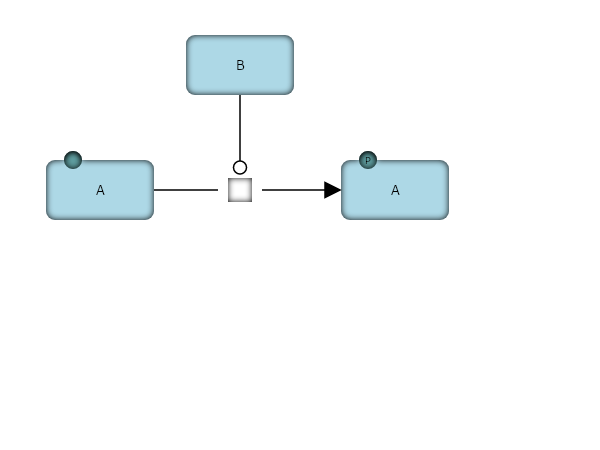

In [37]:
inset_shadows_style = momapy.styling.StyleSheet({
    momapy.styling.ClassSelector("NodeLayout"): momapy.styling.StyleCollection({
        "filter": filter_,
        "stroke": momapy.drawing.NoneValue,
    }),  
})
inset_shadows_style = momapy.styling.join_style_sheets([momapy.sbgn.styling.shadows, inset_shadows_style])
momapy.styling.apply_style_sheet(m1_builder.layout, momapy.sbgn.styling.vanted)
momapy.styling.apply_style_sheet(m1_builder.layout, momapy.sbgn.styling.default_colorscheme)
momapy.styling.apply_style_sheet(m1_builder.layout, inset_shadows_style)
display(m1_builder)

In [38]:
MacromoleculeLayoutBuilder = momapy.builder.get_or_make_builder_cls(momapy.sbgn.pd.MacromoleculeLayout)
m = MacromoleculeLayoutBuilder(
        position=momapy.geometry.PointBuilder(225, 150),
        width=300,
        height=150,
        stroke_width=1,
        rounded_corners=15,
        stroke=momapy.coloring.colors.black,
)

In [39]:
m.north_west()

Point(x=81.01790055165266, y=78.00895027582632)

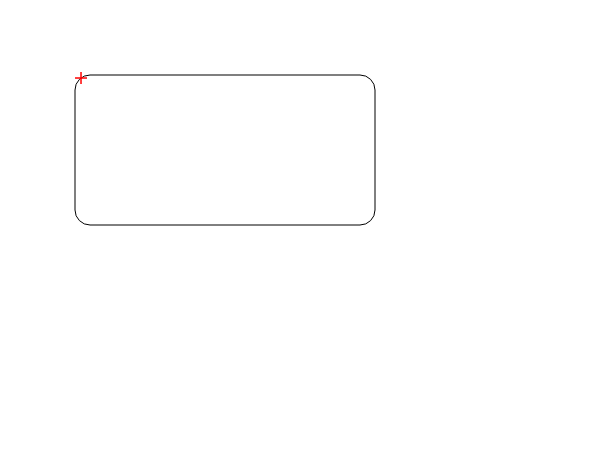

In [40]:
CrossPointBuilder = momapy.builder.get_or_make_builder_cls(momapy.shapes.CrossPoint)
cross_point = CrossPointBuilder(
    width=12.0,
    height=12.0,
    stroke_width=1.5,
    stroke=momapy.coloring.colors.red
)
cross_point.position = m.north_west()
m.add_element(cross_point)
display(m)

All nodes have at least the following anchor points:
* north_west
* north
* north_east
* east
* south_east
* south
* south_west
* west
* center
* label_center

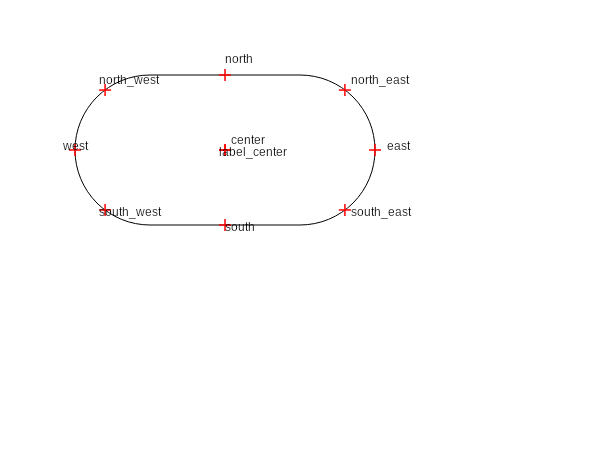

In [41]:
show_room(momapy.sbgn.pd.SimpleChemicalLayout)

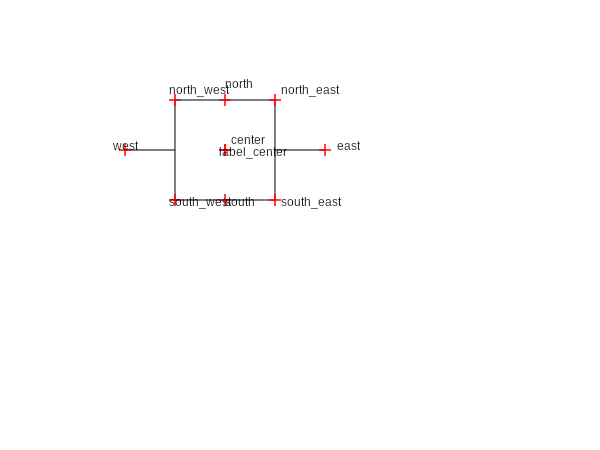

In [42]:
show_room(momapy.sbgn.pd.GenericProcessLayout)

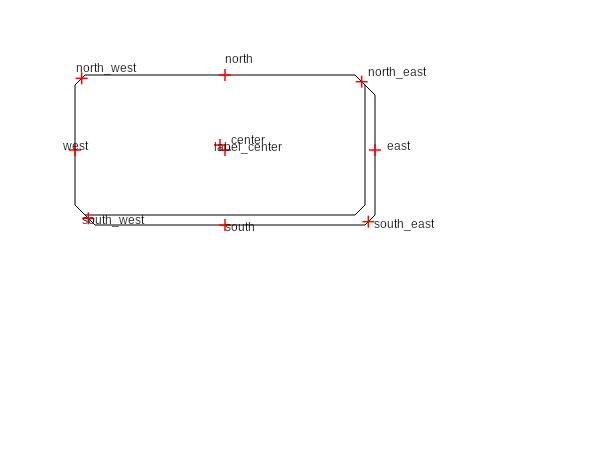

In [43]:
show_room(momapy.sbgn.pd.ComplexMultimerLayout)

In [44]:
m.self_angle(120)

Point(x=181.69872981077808, y=75.0)

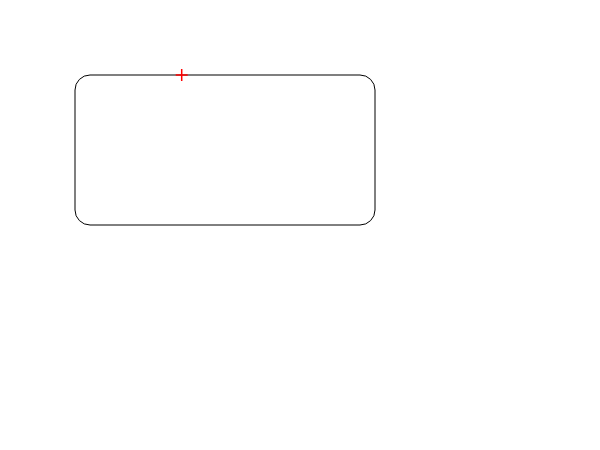

In [45]:
cross_point.position = m.self_angle(120)
display(m)

In [46]:
m.layout_elements.clear()
StateVariableLayoutBuilder = momapy.builder.get_or_make_builder_cls(momapy.sbgn.pd.StateVariableLayout)

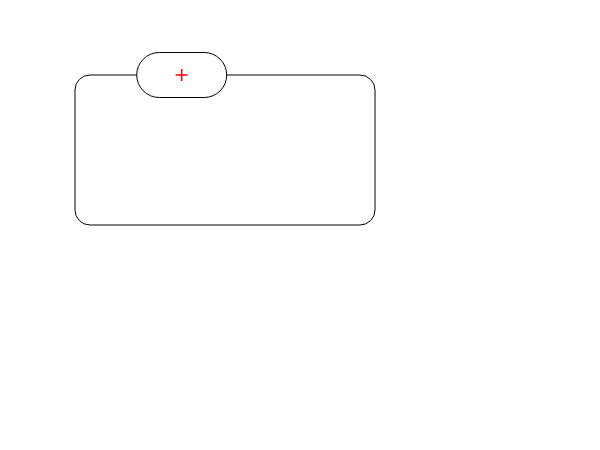

In [47]:
s = StateVariableLayoutBuilder(
    width=90,
    height=45
)
s.position = m.self_angle(120)
m.add_element(s)
cross_point.position = m.self_angle(120)
m.add_element(cross_point)
display(m)

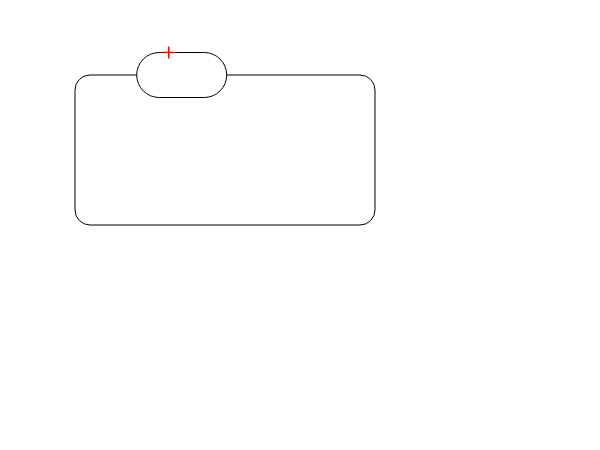

In [48]:
cross_point.position = m.angle(120)
display(m)

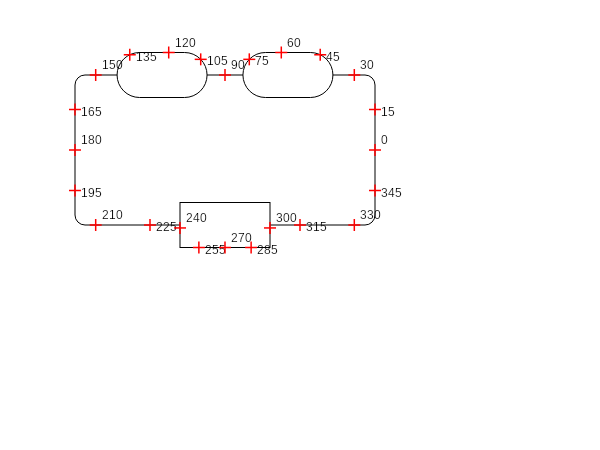

In [49]:
show_room(momapy.sbgn.pd.MacromoleculeLayout, "angle")

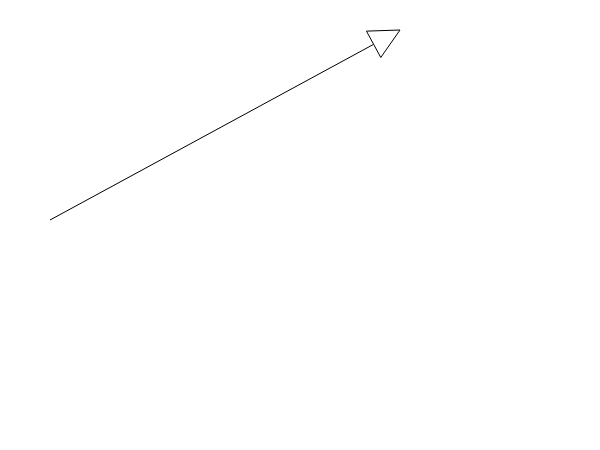

In [50]:
StimulationLayoutBuilder = momapy.builder.get_or_make_builder_cls(momapy.sbgn.pd.StimulationLayout)
s = StimulationLayoutBuilder(
        segments=[momapy.geometry.Segment(momapy.geometry.PointBuilder(50, 220), momapy.geometry.PointBuilder(400, 30))],
        width=30,
        height=30,
        stroke_width=1,
        stroke=momapy.coloring.colors.black,
)
display(s)

In [51]:
s.fraction(0.3)

(Point(x=155.0, y=163.0), 5.785842590832764)

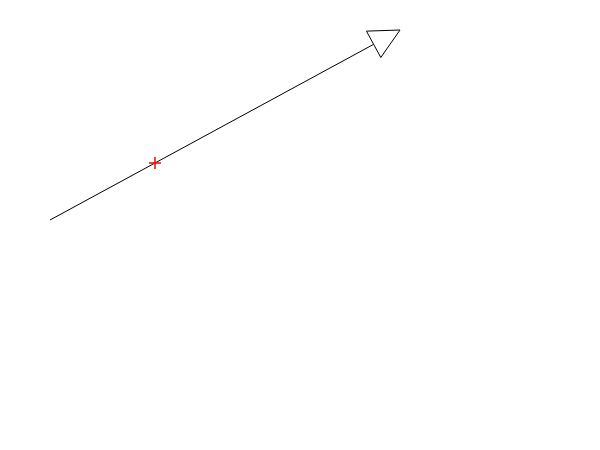

In [52]:
cross_point.position = s.fraction(0.3)[0]
s.add_element(cross_point)
display(s)

In [53]:
s.layout_elements.clear()
CardinalityLayoutBuilder = momapy.builder.get_or_make_builder_cls(momapy.sbgn.pd.CardinalityLayout)

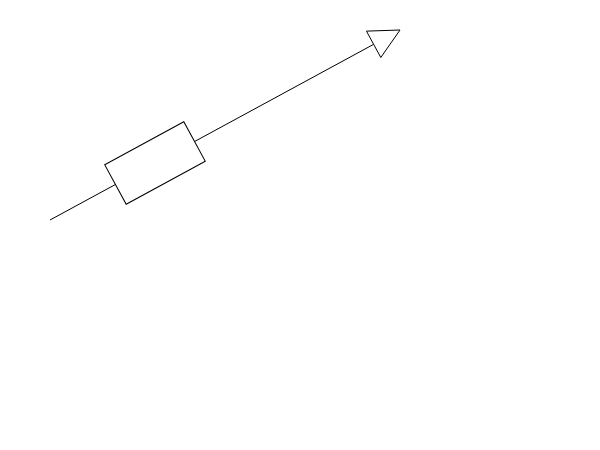

In [54]:
c = CardinalityLayoutBuilder(
    width=90,
    height=45,
)
position, angle = s.fraction(0.3)
c.position = position
c.transform = tuple([momapy.geometry.Rotation(angle, position)])
s.add_element(c)
display(s)

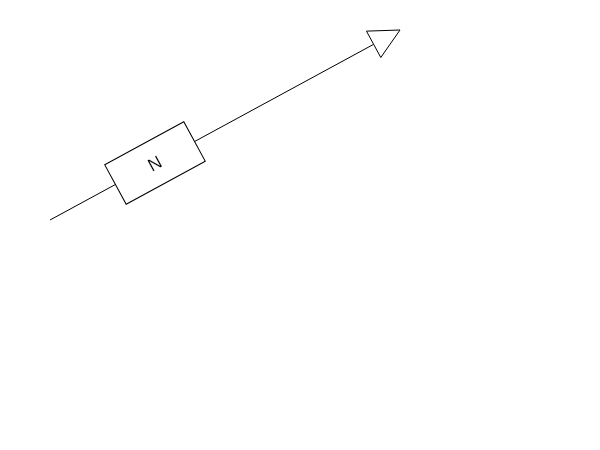

In [55]:
label=momapy.core.TextLayoutBuilder(
    text="N",
    font_family="Arial",
    font_size=18,
    position=c.label_center()
)
c.label = label
display(s)

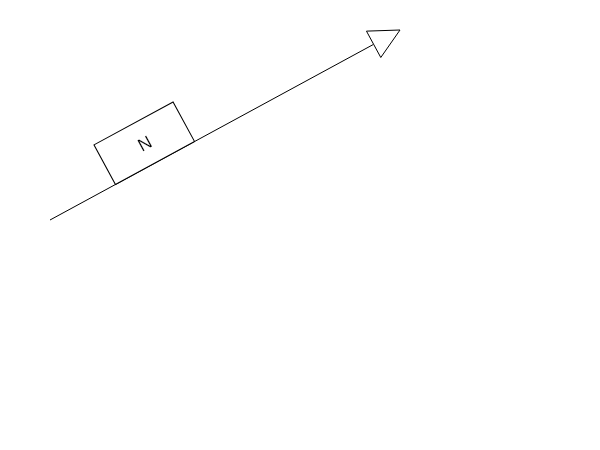

In [56]:
momapy.positioning.set_fraction_of(c, s, 0.3, anchor="south")
c.label.position = c.label_center()
display(s)

In [57]:
class MyTriangle(momapy.core.NodeLayout): # an isocele triangle
    
    def border_drawing_element(self):
        path = momapy.drawing.Path()
        path += momapy.drawing.move_to(self.position - (0, self.height / 2)) # top
        path += momapy.drawing.line_to(self.position + (self.width / 2, self.height / 2)) # bottom right
        path += momapy.drawing.line_to(self.position + (-self.width / 2, self.height / 2)) # bottom left
        path += momapy.drawing.close()
        return path



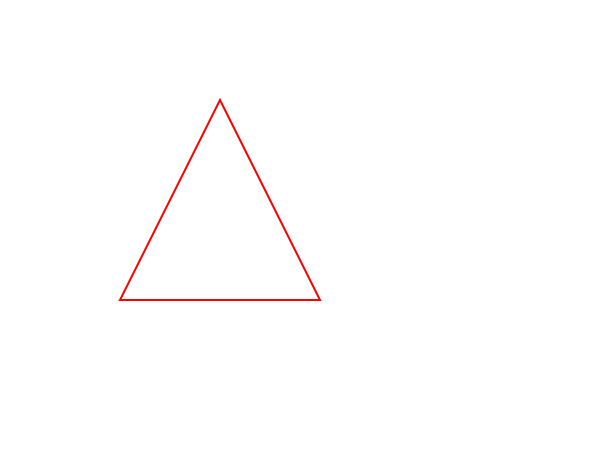

In [58]:
triangle = MyTriangle(
    position=momapy.geometry.Point(220, 200),
    width=200,
    height=200,
    stroke=momapy.coloring.colors.red,
    stroke_width=2,
    fill=momapy.coloring.colors.white)
display(triangle)

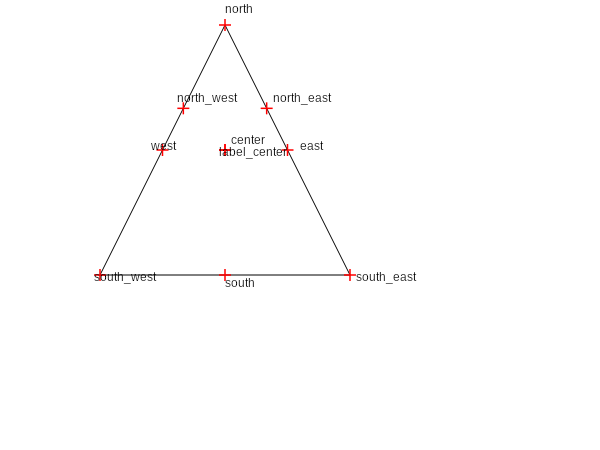

In [59]:
show_room(MyTriangle)

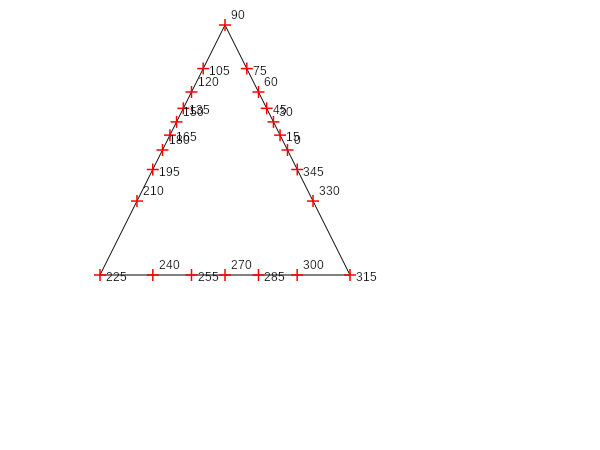

In [60]:
show_room(MyTriangle, "self_angle")

In [61]:
import dataclasses
import momapy.sbgn.core
import typing

@dataclasses.dataclass(frozen=True)
class MySBGNTriangle(
    momapy.sbgn.core._ConnectorsMixin, momapy.sbgn.core._MultiMixin, momapy.sbgn.core._TextMixin, momapy.sbgn.core._SBGNShapeBase
): # a multimer style shape (n=4) with connectors and a pre-defined text "ABCD"
    _shape_cls: typing.ClassVar[
        type
    ] = MyTriangle
    _n: int = 4
    _arg_names_mapping: typing.ClassVar[dict[str, str]] = {}
    _font_family: typing.ClassVar[str] = "Cantarell"
    _font_size_func: typing.ClassVar[typing.Callable] = (
        lambda obj: obj.width / 6
    )
    _font_color: typing.ClassVar[
        momapy.coloring.Color
    ] = momapy.coloring.colors.black
    _text: typing.ClassVar[str] = "ABCD"
    left_connector_length: float = 10.0
    right_connector_length: float = 10.0
    left_connector_stroke_width: float = 1.0
    right_connector_stroke_width: float = 1.0
    width: float = 60
    height: float = 60
    offset: float = 2




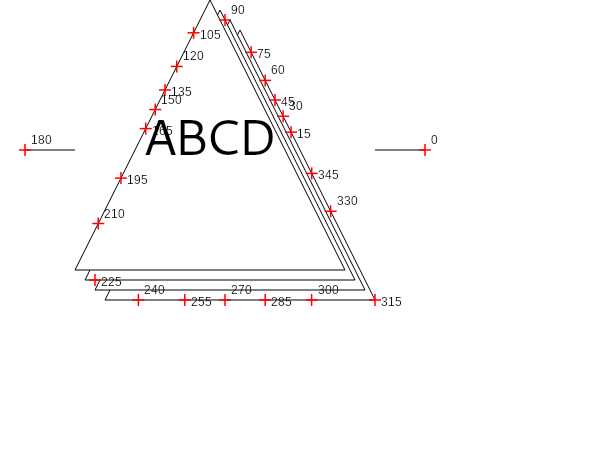

In [62]:
show_room(MySBGNTriangle, "self_angle")